# TP1 : Distribution du tirage de dés
### Auteur : ARGUELLO Camilo


## 1. Estimation du pipage d'un dé
### 1.1. Tirage et remplissage de listes

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
valeurs = [6, 5, 5, 6, 3, 3, 2, 3, 2, 5, 6, 3, 2, 4, 5, 6, 4, 2, 1, 3, 1, 1, 4, 1, 5]
print(len(valeurs))

25


Moyenne: 3.52


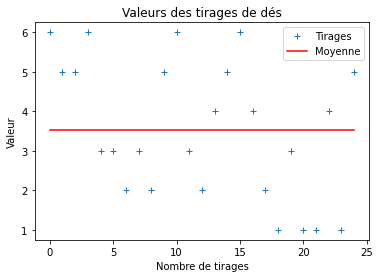

La valeur moyenne trouvée est logique selon la graphique, elle se situe entre 3 et 4.
D'après la valeur minimale est: 1 et la valeur maximale est: 6
On peut donc conclure que la moyenne est logique.


In [55]:
# Calcul de la moyenne
def moyenne(valeurs):
    moyenne = 0
    for num in valeurs:
        moyenne += num
    return moyenne / len(valeurs)

# print with max 2 decimals
print("Moyenne: {:.2f}".format(moyenne(valeurs)))

plt.plot(valeurs, '+', label='Tirages')
plt.plot([moyenne(valeurs)] * len(valeurs), 'r', label='Moyenne')
plt.title('Valeurs des tirages de dés')
plt.xlabel('Nombre de tirages')
plt.ylabel('Valeur')
plt.legend()
plt.show()

print("La valeur moyenne trouvée est logique selon la graphique, elle se situe entre 3 et 4.\nD'après la valeur minimale est: " + str(min(valeurs)) + " et la valeur maximale est: " + str(max(valeurs)) + "\nOn peut donc conclure que la moyenne est logique.")

Moyenne paire: 6.92


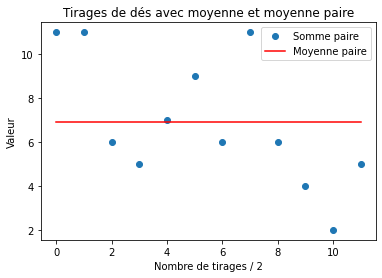

In [56]:
# On calcule la moyenne sur la somme de chaque paire des valeurs
# example 6+5,5+6,3+3,2+3,2+5,6+3,2+4,5+6,4+2,1+3,1+1,4+1,5

def list_somme_paire(valeurs):
    """
    Calcul de la somme de chaque paire des tirages
    """
    somme = []
    for i in range(0, len(valeurs) - 1, 2):
        somme.append(valeurs[i] + valeurs[i+1])
    return somme
    

def moyenne_paire(valeurs):
    """
    Calcul de la moyenne sur la list_somme_paire
    """
    somme = list_somme_paire(valeurs)
    moyenne = 0
    for num in somme:
        moyenne += num
    return moyenne / len(somme)
    

print("Moyenne paire: {:.2f}".format(moyenne_paire(valeurs)))

plt.plot(list_somme_paire(valeurs), 'o', label='Somme paire')
plt.plot([moyenne_paire(valeurs)] * len(list_somme_paire(valeurs)), 'r', label='Moyenne paire')
plt.title('Tirages de dés avec moyenne et moyenne paire')
plt.ylabel('Valeur')
plt.xlabel('Nombre de tirages / 2')
plt.legend()
plt.show()

### 1.2. Calcul des probabilités de tirage et création d'histogrammes

In [62]:
# Dans le tirage de dés, on calcule la fréquence d'apparition (f_i) de chaque valeur
# f_i = rapport entre le nombre de fois où la valeur i est apparue et le nombre total de tirages
def calcul_frequence (valeurs):
    """
    Calcul de la fréquence d'apparition de chaque valeur
    """
    frequence = []
    for i in range(1, 7):
        # Python List.count() method returns the count of how many times a given object occurs in a List.
        frequence.append(valeurs.count(i) / len(valeurs))
    return frequence

print("Fréquence d'apparition: " + str(calcul_frequence(valeurs)))

Fréquence d'apparition: [0.16, 0.16, 0.2, 0.12, 0.2, 0.16]


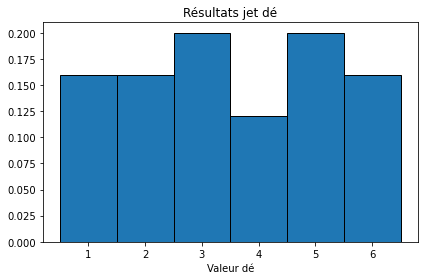

In [63]:
# Création de la figure et des axes
fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True) # Ajout de l'histogramme
axs.hist(valeurs, bins=np.arange(0.5, 7.5, 1), ec="black", density=True)
axs.set_title("Résultats jet dé")
axs.set_xlabel("Valeur dé")
plt.show()

In [76]:
## On calcule les écart entre la frequence et la probabilité p=1/6

def calcul_ecart(valeurs):
    """
    Calcul de l'écart entre la fréquence et la probabilité
    """
    ecart = []
    for i in range(1, 7):
        ecart.append(np.abs(calcul_frequence(valeurs).count(i) - 1/6))
    return ecart

## On calcule la moyenne des écart
def moyenne_ecart(valeurs):
    """
    Calcul de la moyenne des écart
    """
    ecart = calcul_ecart(valeurs)
    moyenne = 0
    for num in ecart:
        moyenne += num
    return moyenne / len(ecart)

print("Moyenne des écart: {:.2f}".format(moyenne_ecart(valeurs)))
print("On peut concluire que le potentiel de popage des dés est faible, car la moyenne des écart est proche de 0.")

Moyenne des écart: 0.17
On peut concluire que le potentiel de popage des dés est faible, car la moyenne des écart est proche de 0.


## 2. Génération de tirage d'un dé

### 2.1. Tirage de dé avec `random`

In [77]:
import random

In [164]:
liste = []
for i in range(0, 100):#int(1e6)):
    liste.append(random.uniform(0, 1))

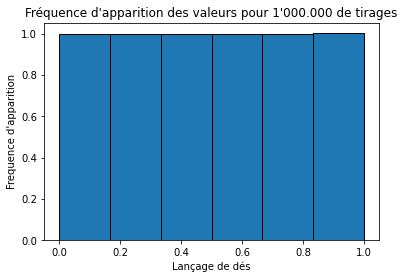

La fréquence d'apparition des valeurs est proche l'une des autres, on peut s'aider avec matplotlib pour trouver si les valeurs sont égaux.


In [150]:
# On range les valeurs dans un histogramme à 6 bins
n, bins, patches = plt.hist(liste, bins=6, ec="black", density=True)
plt.title("Fréquence d'apparition des valeurs pour 1'000.000 de tirages")
plt.xlabel("Lançage de dés")
plt.ylabel("Frequence d'apparition")
plt.show()

print("La fréquence d'apparition des valeurs est proche l'une des autres, on peut s'aider avec matplotlib pour trouver si les valeurs sont égaux.")

In [151]:
# On calcule la fréquence d'apparition de chaque valeur
frequence = []
for i in range(0, 6):
    frequence.append(n[i] / len(liste))

# moyenne de frequence
moyenne_freq = moyenne(frequence)
print("Moyenne de la fréquence: {:.6f}".format(moyenne_freq))

Moyenne de la fréquence: 0.000001


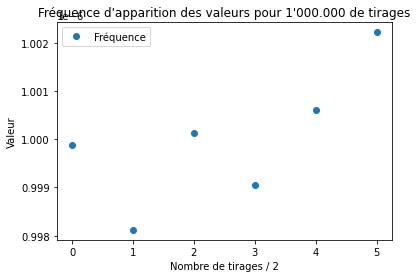

In [157]:
plt.plot(frequence, 'o', label='Fréquence')
# on ajoute une margin entre le titre et le graphique
plt.title('Fréquence d\'apparition des valeurs pour 1\'000.000 de tirages')
plt.ylabel('Valeur')
plt.xlabel('Nombre de tirages / 2')
plt.legend()
plt.show()

In [159]:
print("Moyenne des écart: {:.2f}".format(moyenne_ecart(liste)))

Moyenne des écart: 0.17
